In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

# Data treatment
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.model_selection import train_test_split
import pickle

# Base classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

# Multilabel classifiers - Problem Transformation
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.ensemble import RakelD

# Multilabel classifiers - Algorithm Adaptation
from skmultilearn.adapt import BRkNNaClassifier
from skmultilearn.adapt import MLkNN
from skmultilearn.adapt import MLTSVM

# Metrics
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Embedding classifiers
#from skmultilearn.embedding import OpenNetworkEmbedder, CLEMS, SKLearnEmbedder
#from sklearn.manifold import SpectralEmbedding
#from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
#from skmultilearn.embedding import EmbeddingClassifier
#from sklearn.ensemble import RandomForestRegressor

from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter


import os

In [2]:
DS_FLAGS = ['base',
           'rot',
           'ref',
           'crop1',
           'elastic1',
           'randaug1',
           'gausblur1',
           'blur',
           'mtnblur',
          'rain', 
           'ref_rot',
           'rain_ref_rot',
           'rain_ref_rot_elastic1',
            'blur_rain_ref_rot_elastic1',
            'blur_rain_ref_rot_crop1_elastic1',
            'blur_rain_ref_rot_crop1_randaug1_elastic1'
           ]
output_dir = os.path.join('..', 'outputs', 'resnet')
resnet_names = ['resnet50_evo', 'resnet18_evo']
folder_name = '5-281L'
file_name = 'resultados.csv'

In [ ]:
path_test = os.pat

In [3]:
paths = []
for resnet in resnet_names:
    for ds_flag in DS_FLAGS:
        path = os.path.join(output_dir, resnet, ds_flag, folder_name, file_name)
        print(path)
        paths.append(path)

..\outputs\resnet\resnet50_evo\base\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\rot\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\ref\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\crop1\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\elastic1\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\randaug1\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\gausblur1\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\blur\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\mtnblur\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\rain\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\ref_rot\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\rain_ref_rot\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\rain_ref_rot_elastic1\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\blur_rain_ref_rot_elastic1\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\blur_rain_ref_rot_crop1_elastic1\5-281L\resultados.csv
..\outputs\resnet\resnet50_evo\blur_r

In [4]:
dic = {}
nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]

for resnet in resnet_names:
    for ds_flag in DS_FLAGS:
        path = os.path.join(output_dir, resnet, ds_flag, folder_name, file_name)
        scores = pd.read_csv(path)
        scores.index = pd.MultiIndex.from_arrays(scores[['Unnamed: 0', 'labels']].values.T, names=['Metodo', 'Labels'])
        scores = scores.drop(['Unnamed: 0', 'labels'], axis=1)
        
        experimentos = []

        for score_name in scores.columns:
            if score_name not in dic.keys():
                dic[score_name] = {}

        for metodo in scores.index:
            if resnet=='resnet50_evo':
                llave = 'RN50'
            else:
                llave = 'RN18'
            cool_flag = ds_flag.replace('_', ' ')
            cool_flag = cool_flag.replace('1', '')
            llave += ' ' + cool_flag
            llave += ' ' + metodo[0]
            if llave not in experimentos:
                experimentos.append(llave)

        for llave in experimentos:
            llave_lst = llave.split(' ')
            metodo = llave_lst[len(llave_lst)-1]
            for score_name in scores.columns:
                dic[score_name][llave] = list(scores.loc[metodo][score_name].values)

dic

{'accuracy': {'RN50 base BR_LR': [0.3956,
   0.1044,
   0.0232,
   0.0142,
   0.0065,
   0.0065,
   0.0065,
   0.0052,
   0.0052,
   0.0078,
   0.0078,
   0.0155,
   0.0155],
  'RN50 base CC_LR': [0.4858,
   0.1379,
   0.0503,
   0.0296,
   0.0194,
   0.0193,
   0.0181,
   0.0155,
   0.0155,
   0.018,
   0.0155,
   0.0206,
   0.0155],
  'RN50 base RakelD_LR': [0.3531,
   0.0902,
   0.0168,
   0.0103,
   0.0026,
   0.0078,
   0.0026,
   0.0039,
   0.0026,
   0.0026,
   0.0039,
   0.0035,
   0.0052],
  'RN50 rot BR_LR': [0.4575,
   0.1404,
   0.0361,
   0.0206,
   0.0129,
   0.0116,
   0.0103,
   0.0065,
   0.0039,
   0.0026,
   0.0026,
   0.0052,
   0.0052],
  'RN50 rot CC_LR': [0.5026,
   0.1946,
   0.0773,
   0.0503,
   0.0348,
   0.0322,
   0.0296,
   0.0322,
   0.0296,
   0.0206,
   0.0206,
   0.0206,
   0.0206],
  'RN50 rot RakelD_LR': [0.4601,
   0.1379,
   0.0284,
   0.018,
   0.009,
   0.009,
   0.0065,
   0.0078,
   0.0013,
   0.0039,
   0.0039,
   0.0026,
   0.0034],
  'RN50 r

In [5]:
target = 'f2_score'
target_name = 'F2 Score'
t_scores = dic[target]
t_scores

{'RN50 base BR_LR': [0.7471,
  0.6924,
  0.6163,
  0.587,
  0.5437,
  0.5289,
  0.5174,
  0.5067,
  0.4968,
  0.4882,
  0.4722,
  0.4669,
  0.4472],
 'RN50 base CC_LR': [0.7372,
  0.6792,
  0.5899,
  0.5649,
  0.5084,
  0.4975,
  0.4882,
  0.4718,
  0.464,
  0.4585,
  0.4459,
  0.4295,
  0.4221],
 'RN50 base RakelD_LR': [0.7206,
  0.6507,
  0.5805,
  0.5552,
  0.5135,
  0.5039,
  0.4929,
  0.4828,
  0.4694,
  0.4622,
  0.4498,
  0.4426,
  0.426],
 'RN50 rot BR_LR': [0.7793,
  0.732,
  0.6688,
  0.6397,
  0.6097,
  0.5979,
  0.5871,
  0.5776,
  0.5681,
  0.5612,
  0.5479,
  0.5403,
  0.5204],
 'RN50 rot CC_LR': [0.775,
  0.7211,
  0.6552,
  0.6245,
  0.5839,
  0.5735,
  0.5623,
  0.557,
  0.5478,
  0.5523,
  0.5415,
  0.5481,
  0.53],
 'RN50 rot RakelD_LR': [0.7735,
  0.7061,
  0.6349,
  0.6163,
  0.5873,
  0.5758,
  0.5728,
  0.5647,
  0.5501,
  0.5512,
  0.5392,
  0.5218,
  0.5077],
 'RN50 ref BR_LR': [0.785,
  0.7262,
  0.6558,
  0.6298,
  0.5886,
  0.5747,
  0.5639,
  0.5541,
  0.54

In [8]:
np.average(t_scores['RN18 blur rain ref rot crop elastic BR_LR'])

0.6340153846153848

In [9]:
AUCS = {}
for curva, valores in t_scores.items():
    auc = 0
    for i in range(len(valores)-1):
        score_init = valores[i]
        score_final = valores[i+1]
        low_score = min(score_init, score_final)
        high_score = max(score_init, score_final)
        rectangulo = low_score * (nlabels[i+1] - nlabels[i]) 
        triangulo = high_score * (nlabels[i+1] - nlabels[i])/2
        auc += rectangulo + triangulo
    AUCS[curva] = auc
AUCS

{'RN50 base BR_LR': 205.6211,
 'RN50 base CC_LR': 193.50785000000002,
 'RN50 base RakelD_LR': 195.1486,
 'RN50 rot BR_LR': 234.31015,
 'RN50 rot CC_LR': 232.8062,
 'RN50 rot RakelD_LR': 227.56725,
 'RN50 ref BR_LR': 227.3952,
 'RN50 ref CC_LR': 215.5049,
 'RN50 ref RakelD_LR': 216.01055000000002,
 'RN50 crop BR_LR': 193.6495,
 'RN50 crop CC_LR': 174.0072,
 'RN50 crop RakelD_LR': 182.50265,
 'RN50 elastic BR_LR': 225.91745000000003,
 'RN50 elastic CC_LR': 220.79629999999997,
 'RN50 elastic RakelD_LR': 223.1676,
 'RN50 randaug BR_LR': 218.1495,
 'RN50 randaug CC_LR': 212.89175,
 'RN50 randaug RakelD_LR': 211.61475000000002,
 'RN50 gausblur BR_LR': 218.76989999999998,
 'RN50 gausblur CC_LR': 212.13434999999998,
 'RN50 gausblur RakelD_LR': 212.56339999999997,
 'RN50 blur BR_LR': 231.73194999999998,
 'RN50 blur CC_LR': 225.87775,
 'RN50 blur RakelD_LR': 229.33159999999998,
 'RN50 mtnblur BR_LR': 189.83465,
 'RN50 mtnblur CC_LR': 180.1034,
 'RN50 mtnblur RakelD_LR': 184.10665,
 'RN50 rain BR

In [10]:
#scores_df = pd.DataFrame.from_dict(t_scores, orient='index', columns=nlabels)
#mean_df = scores_df.mean(axis=1).sort_values(axis=0, ascending=False)
#mejores_curvas = mean_df.index[0:15]

#scores_df = pd.DataFrame.from_dict(t_scores, orient='index', columns=nlabels)
#mean_df = scores_df.mean(axis=1).sort_values(axis=0, ascending=False)
#mejores_curvas = mean_df.index[0:15]


scores_df = pd.DataFrame.from_dict(AUCS, orient='index') #columns=nlabels
auc_df = scores_df.sort_values(by=0, axis=0, ascending=False)
mejores_curvas = auc_df.index[0:15]

filtered_scores = {}
for curva in mejores_curvas:
    filtered_scores[curva] = t_scores[curva]
filtered_scores


{'RN18 blur rain ref rot crop elastic BR_LR': [0.7933,
  0.7466,
  0.6852,
  0.6646,
  0.6367,
  0.6267,
  0.6197,
  0.6106,
  0.6035,
  0.5811,
  0.5677,
  0.5614,
  0.5451],
 'RN18 blur rain ref rot crop randaug elastic BR_LR': [0.7849,
  0.7375,
  0.6839,
  0.6617,
  0.6353,
  0.6252,
  0.6188,
  0.6096,
  0.6034,
  0.5841,
  0.5728,
  0.5631,
  0.5433],
 'RN50 rain ref rot elastic BR_LR': [0.8043,
  0.7532,
  0.6919,
  0.6662,
  0.6381,
  0.6261,
  0.6176,
  0.6076,
  0.5998,
  0.5832,
  0.57,
  0.5583,
  0.5381],
 'RN18 blur rain ref rot elastic BR_LR': [0.783,
  0.7328,
  0.6782,
  0.6548,
  0.6285,
  0.618,
  0.6099,
  0.6018,
  0.5957,
  0.5845,
  0.5694,
  0.5616,
  0.5406],
 'RN18 rain ref rot elastic BR_LR': [0.7795,
  0.733,
  0.6809,
  0.659,
  0.6301,
  0.6201,
  0.6137,
  0.6032,
  0.5977,
  0.5792,
  0.5672,
  0.5599,
  0.5408],
 'RN18 rain BR_LR': [0.8012,
  0.7472,
  0.6809,
  0.6615,
  0.6296,
  0.6153,
  0.6074,
  0.5991,
  0.5918,
  0.5783,
  0.5644,
  0.5614,
  0.

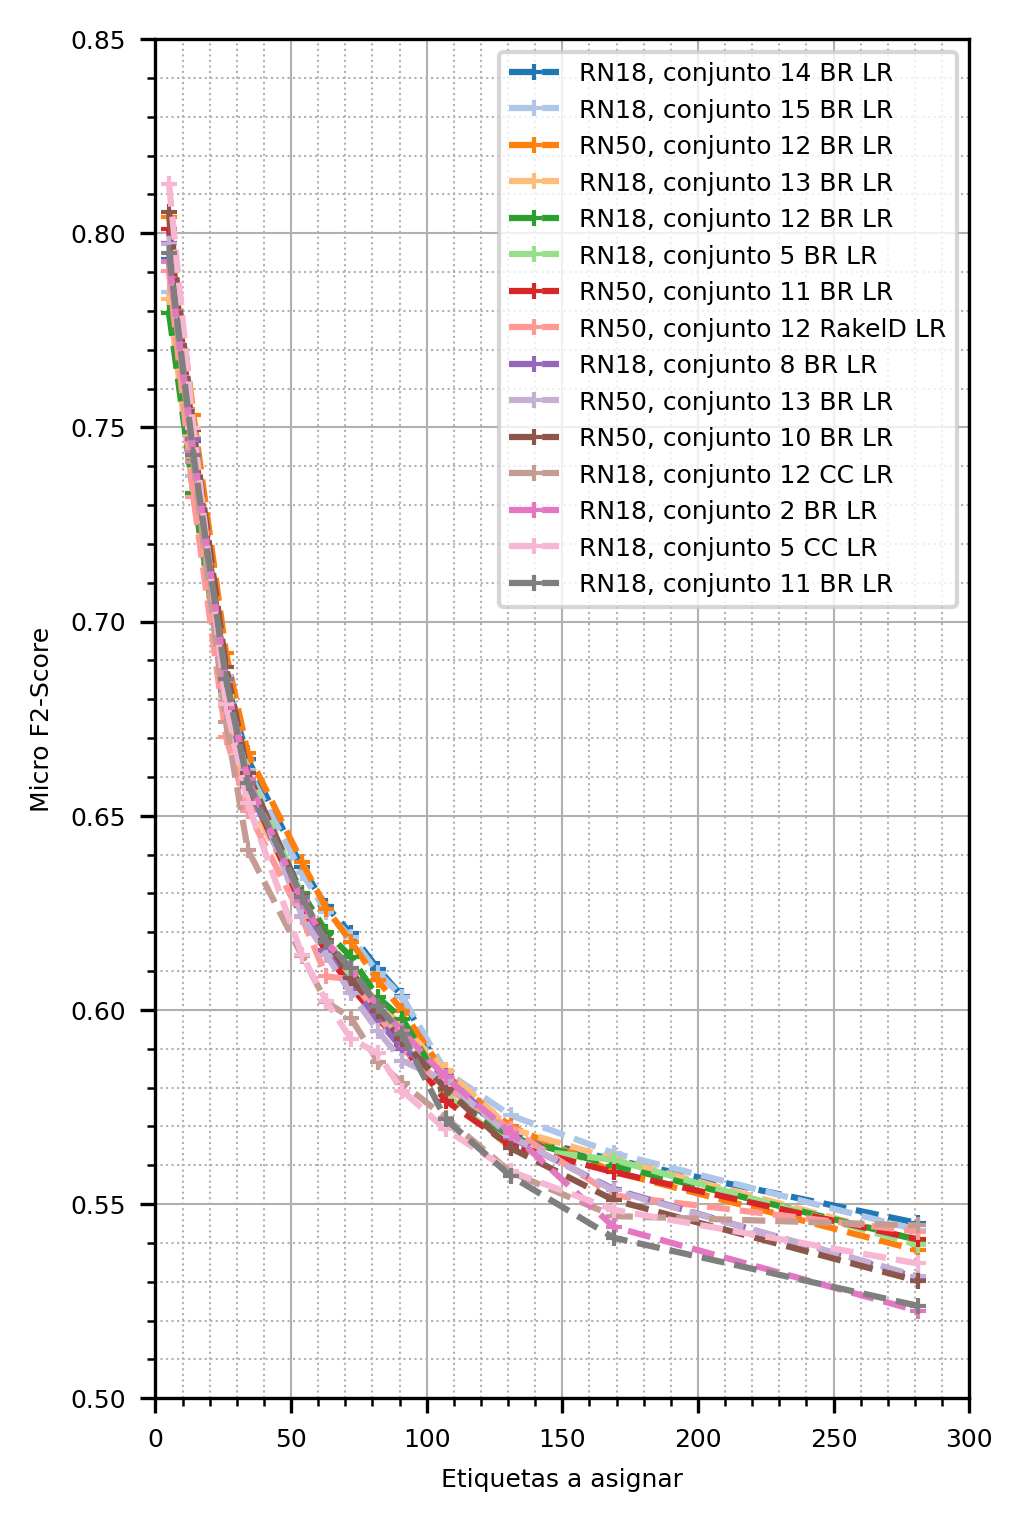

In [105]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 300
plotter = KunischPlotter()

labels = list(filtered_scores.keys())
labels_pp = []
da_map = {
    'base': 0,
    'rot': 1,
    'ref': 2,
    'crop': 3,
    'elastic': 4,
    'rain': 5,
    'randaug': 6,
    'gausblur': 7,
    'blur': 8,
    'mtnblur': 9,
    'ref rot': 10,
    'rain ref rot': 11,
    'rain ref rot elastic': 12,
    'blur rain ref rot elastic': 13,
    'blur rain ref rot crop elastic': 14,
    'blur rain ref rot crop randaug elastic': 15,
}
for label in labels:
    label_lst = label.split(' ')
    das = label_lst[1: len(label_lst) - 1]
    metodos = ' '.join(x for x in label_lst[len(label_lst) - 1:]).replace('_', ' ')
    label_clean = ' '.join(x for x in das).replace('_', ' ')
    labels_pp.append(label_lst[0] + ', conjunto ' + str(da_map[label_clean]) + ' ' + metodos)
plotter.plot_results(nlabels,
             score = list(filtered_scores.values()),
             label = labels_pp,
             #title = target_name + ' v/s Cantidad de Etiquetas\nVariando Descriptores y D.A.',
             xlabel = "Etiquetas a asignar", ylabel = target_name,
             ylim = 0.85,
             y_low_lim = 0.5,
             xlim = 300,
             width = 3.5,
             height = 6,
             grid = True,
             minorgrid = True)

#              order = [0, 8, 12, 4, 1, 9, 13, 3, 7, 16, 17, 2, 14, 10, 5, 6, 15, 11, 18])

In [98]:
AUCS = {}
for target in dic.keys():
    AUC_target = {}
    t_scores = dic[target]
    for curva, valores in t_scores.items():
        auc_curva = 0
        for i in range(len(valores)-1):
            score_init = valores[i]
            score_final = valores[i+1]
            low_score = min(score_init, score_final)
            high_score = max(score_init, score_final)
            rectangulo = low_score * (nlabels[i+1] - nlabels[i]) 
            triangulo = high_score * (nlabels[i+1] - nlabels[i])/2
            auc_curva += rectangulo + triangulo
        AUC_target[curva] = auc_curva
    AUCS[target] = AUC_target
    
    
aucs_df = pd.DataFrame.from_dict(AUCS) #columns=nlabels
aucs_df = aucs_df.sort_values(by='f2_score', axis=0, ascending=False)

descriptores = []
tecnicas = []
metodos = []
for ind in aucs_df.index:
    ind_list = ind.split(' ')
    descriptor = ind_list[0].replace('RN', 'ResNet')
    tecnica = ' '.join(x for x in ind_list[1:len(ind_list)-1])
    metodo = ind_list[len(ind_list)-1].replace('_', ' ')
    descriptores.append(descriptor)
    tecnicas.append(tecnica)
    metodos.append(metodo)
    
aucs_df['Origen descriptores'] = descriptores
aucs_df['Conjunto de datos'] = tecnicas
aucs_df['Metodo'] = metodos
aucs_df = aucs_df.drop(columns=['2mr', '3mr', '4mr', 'f1_score', 'hamming_loss', 'accuracy'])
aucs_df = aucs_df[['Origen descriptores', 'Conjunto de datos', 'Metodo', 'f2_score', 'recall', 'precision', 'hamming_score', 'emr', '1mr', '5mr']]
display(aucs_df)

,Origen descriptores,Conjunto de datos,Metodo,f2_score,recall,precision,hamming_score,emr,1mr,5mr
RN18 blur rain ref rot crop elastic BR_LR,ResNet18,blur rain ref rot crop elastic,BR LR,244.04815,284.66905,157.00355,6.81590,13.19610,398.14765,164.54675
RN18 blur rain ref rot crop randaug elastic BR_LR,ResNet18,blur rain ref rot crop randaug elastic,BR LR,243.97900,280.17370,162.09615,7.00635,10.76145,392.91230,153.86860
RN50 rain ref rot elastic BR_LR,ResNet50,rain ref rot elastic,BR LR,243.30535,283.76480,156.76945,6.85655,9.25925,393.05845,169.75480
RN18 blur rain ref rot elastic BR_LR,ResNet18,blur rain ref rot elastic,BR LR,242.47375,276.92095,163.18590,6.88060,16.43945,394.84840,159.39910
RN18 rain ref rot elastic BR_LR,ResNet18,rain ref rot elastic,BR LR,242.37445,276.73390,163.24595,6.92240,14.90215,392.63610,159.22780
...,...,...,...,...,...,...,...,...,...,...
RN50 mtnblur BR_LR,ResNet50,mtnblur,BR LR,189.83465,272.37100,89.37140,6.60815,3.31480,394.47945,143.54165
RN50 mtnblur RakelD_LR,ResNet50,mtnblur,RakelD LR,184.10665,258.02595,89.24310,7.21470,3.52650,389.30215,121.18980
RN50 crop RakelD_LR,ResNet50,crop,RakelD LR,182.50265,255.00455,88.17580,7.18140,2.87465,386.93505,120.88575
RN50 mtnblur CC_LR,ResNet50,mtnblur,CC LR,180.10340,210.43030,114.90410,6.68225,6.33900,349.58660,81.18645


In [99]:
aucs_df.to_csv('aucs_e3.csv')

[244.04815, 243.97899999999998, 243.30535, 242.47375, 242.37444999999997, 242.25490000000002, 241.9622, 241.13915, 240.65305, 240.5909, 240.50130000000001, 239.3588, 239.06175, 238.77669999999998, 238.16270000000003]
[238.16270000000003, 238.77669999999998, 239.06175, 239.3588, 240.50130000000001, 240.5909, 240.65305, 241.13915, 241.9622, 242.25490000000002, 242.37444999999997, 242.47375, 243.30535, 243.97899999999998, 244.04815]
['RN18, conjunto 14 BR LR', 'RN18, conjunto 15 BR LR', 'RN50, conjunto 12 BR LR', 'RN18, conjunto 13 BR LR', 'RN18, conjunto 12 BR LR', 'RN18, conjunto 5 BR LR', 'RN50, conjunto 11 BR LR', 'RN50, conjunto 12 RakelD LR', 'RN18, conjunto 8 BR LR', 'RN50, conjunto 13 BR LR', 'RN50, conjunto 10 BR LR', 'RN18, conjunto 12 CC LR', 'RN18, conjunto 2 BR LR', 'RN18, conjunto 5 CC LR', 'RN18, conjunto 11 BR LR']


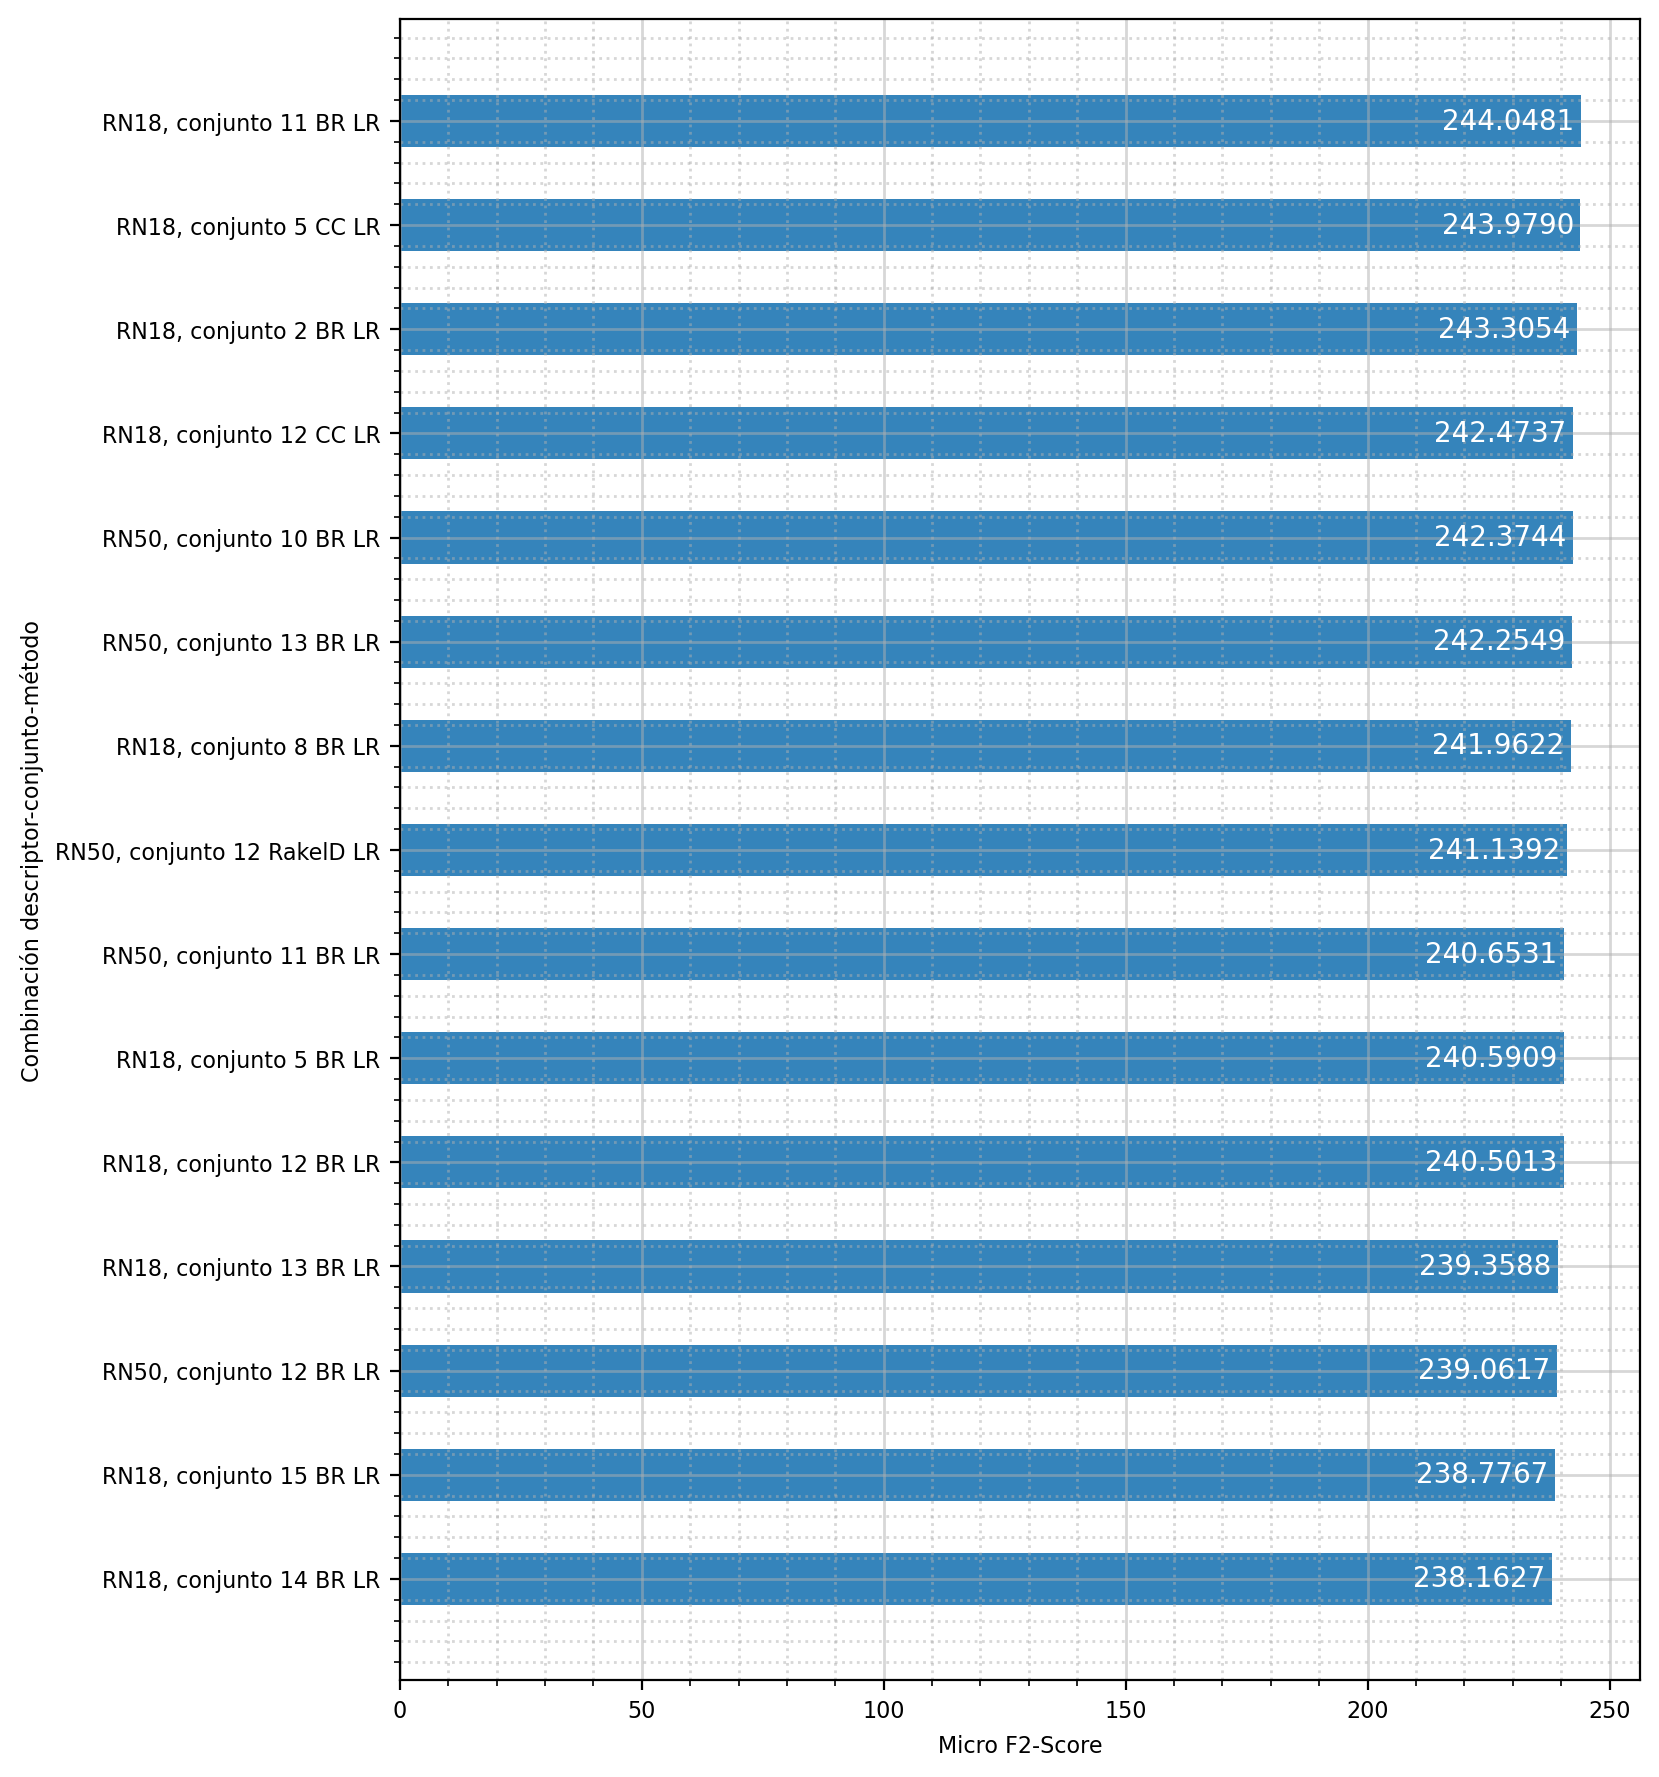

In [103]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.dpi'] = 300

target = 'f2_score'
target_name = 'Micro F2-Score'
puntajes = aucs_df[target].values[0:15].tolist()
print(puntajes)
puntajes.reverse()
print(puntajes)
labels_pp.reverse()
print(labels_pp)

x = np.arange(len(labels_pp))

fig, ax = plt.subplots()
width = 0.5
ax.bar_label(b1, fmt= '%.4f', padding=-50, color='white', size=10)

b1 = ax.barh(x, puntajes, width, color='tab:blue', alpha=0.9)

ax.set_xlabel(target_name)
ax.set_ylabel('Combinación descriptor-conjunto-método')

#ax.set_title(target_name + '\nAUC curvas de micro F2-Score\nVariando Descriptores y D.A.')

# rotar labels del eje x
#plt.xticks(rotation=90)
fig.set_size_inches(8, 11)
fig.set_dpi(200)

ax.grid(which='both')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1', alpha=0.5)
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='1', alpha=0.5)
ax.set_yticks(x, labels_pp)

#ax.set_xlim(0, 1)
plt.show()
